In [1]:
# 共有変数
import numpy as np 
import theano

# メモリに乗せるためにfloatX型にする必要がある
data = np.array([[1,2,3], [4,5,6]], dtype = theano.config.floatX)
# borrowは基本Trueでおけ
X = theano.shared(data, name = 'X', borrow = True)
print X.get_value()

# 共有変数は最初から値が入っている
# 普通のシンボルは関数の結果として値が与えられる
# この違いに注意

[[ 1.  2.  3.]
 [ 4.  5.  6.]]


In [2]:
# 共有変数を使う例

# 線形回帰の形を作る
# 回帰係数の値を共有変数としておく
import numpy as np
import theano
import theano.tensor as T

# 共有変数を定義する
# 初期値を設定して、そこから初期化していくイメージ
w = theano.shared(np.array([[1,2,3], [4,5,6]], dtype = theano.config.floatX), name = 'w', borrow = True)
b = theano.shared(np.array([1,1], dtype = theano.config.floatX), name = 'b', borrow = True )

# 共有変数の値所得
print w.get_value()
print b.get_value()

# 下のような変数(シンボル)は、関数ありき
# 最初から値が入っているわけではない
x = T.vector('x')

# 回帰関数の提示
y = T.dot(w, x) + b
print type(y)

f = theano.function([x], y)

print f([1,1,1])

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[ 1.  1.]
<class 'theano.tensor.var.TensorVariable'>
[  7.  16.]


In [3]:
# 微分の例

x = T.dscalar('x')
y = T.exp(x) * x

gy = T.grad(y, x)

f = theano.function([x], gy)
print theano.pp(f.maker.fgraph.outputs[0])

print f(2)
print f(3)

Elemwise{Composite{((i0 * exp(i0)) + exp(i0))}}(x)
22.1671682968
80.3421476928


In [4]:
x = T.dscalar('x')
y = T.sin(x)

gy = T.grad(y, x)

f = theano.function([x], gy)
print theano.pp(f.maker.fgraph.outputs[0])

print f(2)
print f(3)

cos(x)
-0.416146836547
-0.9899924966


In [5]:
x = T.dscalar('x')
y = (x - 4) * (x ** 3 + 4*x -10)

gy = T.grad(y, x)

f = theano.function([x], gy)
print theano.pp(f.maker.fgraph.outputs[0])

print f(2)
print f(3)

Elemwise{Composite{(i0 + Composite{(sqr(i0) * i0)}(i1) + (i2 * i1) + (i3 * (i4 + i1) * sqr(i1)) + (i2 * (i4 + i1)))}}(TensorConstant{-10.0}, x, TensorConstant{4.0}, TensorConstant{3.0}, TensorConstant{-4.0})
-26.0
-2.0


In [6]:
x = T.dscalar('x')
y = (T.sqrt(x) + 3) ** 3

gy = T.grad(y, x)

f = theano.function([x], gy)
print theano.pp(f.maker.fgraph.outputs[0])

print f(2)
print f(3)

Elemwise{Composite{((i0 * sqr((i1 + sqrt(i2)))) / sqrt(i2))}}(TensorConstant{1.5}, TensorConstant{3.0}, x)
20.6672618896
19.3923048454


In [7]:
# 偏微分もできちゃうよ

x = T.dscalar('x')
y = T.dscalar('y')

z = (x + 2 * y) ** 2

gx = T.grad(z, x)
gy = T.grad(z, y)

fgx = theano.function([x, y], gx)
fgy = theano.function([x, y], gy)

print fgx(1,2)
print fgy(1,3)
print fgx(2,2)
print fgy(3,2)

10.0
28.0
12.0
28.0


In [10]:
# ロジスティック回帰
# コスト関数は交差エントロピー誤差関数と呼ばれる（ただの対数尤度関数の負）
# これ自体はめっちゃ簡単
# 次のcellで実際に使う

# cost function
# sigmoidはロジット関数のこと
# nnet はneural network で使われるOpを集めたmodule
h = T.nnet.sigmoid(T.dot(X, theta))
cost = (1.0/m) * T.sum(-y * T.log(h) - (1- y) * T.log(1 - h))

# cost functionの微分
g_theta = T.grad(cost, theta)

# パラメータ更新
# updates はfunctionのオプションとして指定できる
# 関数の実行後にthetaを更新する
learing_rate = 0.001
updates = [(theta, theta - learing_rate * g_theta)]

# 訓練関数
train = theano.function([X], cost, updates = updates)

# iteration
iteration = 300000
for iter in range(iteration):
    current_cost = train()
    print iter, current_cost

NameError: name 'theta' is not defined

theta :  [-4.81180027  0.04528064  0.03819149]
-125.991410206 1.18562104996


<function matplotlib.pyplot.show>

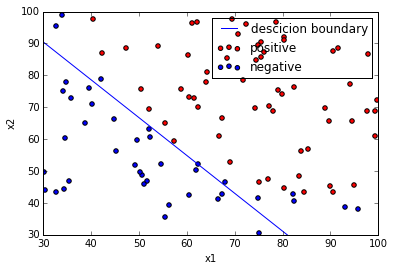

In [43]:
# theanoによる2項ロジット判別
# non stochastic gradient descent
# iteration回数100000回

% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

# データのロード
# numpy を使用
data = np.genfromtxt('ex2data1.txt', delimiter = ',')
data_x = data[:, (0,1)]
data_y = data[:, 2]

# サンプル数
m = len(data_y)

# 定数項部分の追加
data_x = np.hstack((np.ones((m, 1)), data_x))

# theanoで変数をシンボル化
X = theano.shared(np.asarray(data_x, dtype = theano.config.floatX), borrow = True)
y = theano.shared(np.asarray(data_y, dtype = theano.config.floatX), borrow = True)

# パラメータもシンボルにする
theta = theano.shared(np.zeros(3, dtype = theano.config.floatX), borrow = True, name = 'theta')

# cost function
# sigmoidはロジット関数のこと
# nnet はneural network で使われるOpを集めたmodule
h = T.nnet.sigmoid(T.dot(X, theta))
cost = (1.0/m) * T.sum(-y * T.log(h) - (1- y) * T.log(1 - h))

# cost functionの微分
g_theta = T.grad(cost, theta)

# パラメータ更新
# updates はfunctionのオプションとして指定できる
# 関数の実行後にthetaを更新する
learing_rate = 0.001
updates = [(theta, theta - learing_rate * g_theta)]

# 訓練関数
train = theano.function([], cost, updates = updates)

# iterationして、更新されたコスト関数の値を表示
iteration = 100000
for iter in range(iteration):
    current_cost = train()
    # print iter, current_cost
    
#  更新されたパラメータの値を表示
# get_valueは共有変数の現時点での値を取ってくる関数
t = theta.get_value() 
print 'theta : ' , t

# データのプロット
# 正負のラベル付け
plt.figure(1)

positive = [i for i in range(len(data_y)) if data_y[i] == 1]
negative = [i for i in range(len(data_y)) if data_y[i] == 0]

plt.scatter(data_x[positive, 1], data_x[positive, 2], c = 'red', marker = 'o', label = 'positive')
plt.scatter(data_x[negative, 1], data_x[negative, 2], c = 'blue', marker = 'o', label = 'negative')

# 境界曲線の図示
plt.figure(1)
xmin, xmax = min(data_x[:, 1]), max(data_x[:, 1])
xs = np.linspace(xmin, xmax, 100) # 直線を弾く時の常套手段
print t[0] / t[2], t[1] / t[2]
ys = [-(t[0] / t[2]) - (t[1] / t[2]) * x for x in xs]
plt.plot(xs, ys, 'b-', label = 'descicion boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim((30, 100))
plt.ylim((30, 100))
plt.legend() # 凡例を表示
plt.show


In [52]:
# これもできる！
np.random.permutation(10)

array([2, 7, 0, 1, 8, 5, 6, 3, 4, 9])

theta :  [-2.96989381  0.02549646  0.02683543]
-110.670625925 0.950104296547


<function matplotlib.pyplot.show>

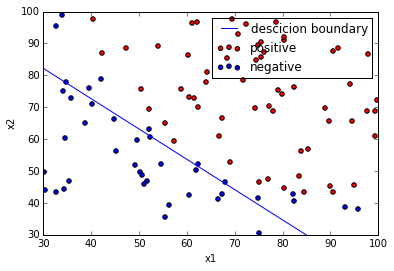

In [53]:
# stochastic gradient descent

% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

# データのロード
# numpy を使用
data = np.genfromtxt('ex2data1.txt', delimiter = ',')
data_x = data[:, (0,1)]
data_y = data[:, 2]

# サンプル数
m = len(data_y)

# 定数項部分の追加
data_x = np.hstack((np.ones((m, 1)), data_x))

# データをシャッフル
p = np.random.permutation(m)
data_x = data_x[p, :]
data_y = data_y[p]

# theanoで変数をシンボル化
X = theano.shared(np.asarray(data_x, dtype = theano.config.floatX), borrow = True)
y = theano.shared(np.asarray(data_y, dtype = theano.config.floatX), borrow = True)

# パラメータもシンボルにする
theta = theano.shared(np.zeros(3, dtype = theano.config.floatX), borrow = True, name = 'theta')

# 訓練データのインデックスを表すシンボルを定義
index = T.lscalar()

# cost function
# sigmoidはロジット関数のこと
# nnet はneural network で使われるOpを集めたmodule
# 確率的勾配降下法では、全データの和ではなく、index番目のデータのみを使う
h = T.nnet.sigmoid(T.dot(theta, X[index, :]))
cost = -y[index] * T.log(h) - (1 - y[index]) * T.log(1 - h)

# cost functionの微分
g_theta = T.grad(cost, theta)

# パラメータ更新
# updates はfunctionのオプションとして指定できる
# 関数の実行後にthetaを更新する
learing_rate = 0.0001
updates = [(theta, theta - learing_rate * g_theta)]

# 訓練関数
# index番目のデータを使って更新する
train = theano.function([index], cost, updates = updates)

# 確率的勾配降下法
max_epoch = 5000
for epoch in range(max_epoch):
    for i in range(m):
        current_cost = train(i)
    # print epoch, current_cost
    
#  更新されたパラメータの値を表示
# get_valueは共有変数の現時点での値を取ってくる関数
t = theta.get_value() 
print 'theta : ' , t

# データのプロット
# 正負のラベル付け
plt.figure(1)

positive = [i for i in range(len(data_y)) if data_y[i] == 1]
negative = [i for i in range(len(data_y)) if data_y[i] == 0]

plt.scatter(data_x[positive, 1], data_x[positive, 2], c = 'red', marker = 'o', label = 'positive')
plt.scatter(data_x[negative, 1], data_x[negative, 2], c = 'blue', marker = 'o', label = 'negative')

# 境界曲線の図示
plt.figure(1)
xmin, xmax = min(data_x[:, 1]), max(data_x[:, 1])
xs = np.linspace(xmin, xmax, 100) # 直線を弾く時の常套手段
print t[0] / t[2], t[1] / t[2]
ys = [-(t[0] / t[2]) - (t[1] / t[2]) * x for x in xs]
plt.plot(xs, ys, 'b-', label = 'descicion boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim((30, 100))
plt.ylim((30, 100))
plt.legend() # 凡例を表示
plt.show


theta: [  9.44115420e-01   4.36923548e-01   9.51524016e-01  -1.56372209e+00
  -6.26567671e-01  -9.31626085e-01   3.43895765e-02  -2.66886935e-01
  -2.62338995e-01  -1.87342074e-01  -1.19823089e+00  -6.04117633e-02
  -4.65986699e-01  -1.76960913e-01  -9.64022333e-01  -2.45152589e-01
  -1.64880721e-01  -5.82740423e-02  -2.07760698e-01  -2.01944413e-01
  -4.96066116e-01  -8.82084612e-01  -4.00150353e-04  -2.31116262e-01
  -2.56569103e-04  -2.53946918e-01  -8.55348272e-02  -8.62838147e-01]


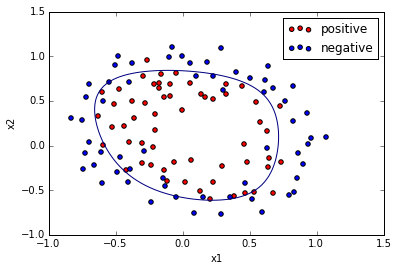

In [62]:
# 正則化項をいれる
# 正則化項はパラメータの二乗和
# パラメータは28個
# オーバーフィッティングを防ぐために正則化項を入れる

import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

def plot_data(X, y):
    # positiveクラスのデータのインデックス
    positive = [i for i in range(len(y)) if y[i] == 1]
    # negativeクラスのデータのインデックス
    negative = [i for i in range(len(y)) if y[i] == 0]

    plt.scatter(X[positive, 0], X[positive, 1], c='red', marker='o', label="positive")
    plt.scatter(X[negative, 0], X[negative, 1], c='blue', marker='o', label="negative")

    
# こんなことするんだね
def mapFeature(x1, x2, degree=6):
    """
    特徴x1と特徴x2を組み合わせたdegree次（ここでは6次）の項まで特徴をデータに追加
    バイアス項に対応するデータ1も追加
    """
    # データ行列に1を追加
    m = x1.shape[0]
    data_x = np.ones((m, 1))
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            new_x = (x1 ** (i - j) * x2 ** j).reshape((m, 1)) # 二項定理みたいな感じで追加していく
            data_x = np.hstack((data_x, new_x))
    return data_x

if __name__ == "__main__":
    # 訓練データをロード
    data = np.genfromtxt("ex2data2.txt", delimiter=",")
    # print data
    data_x = data[:, (0,1)]
    data_y = data[:, 2]

    # 訓練データ数
    m = len(data_y)

    # 訓練データをプロット
    plt.figure(1)
    plot_data(data_x, data_y)

    # 特徴量のマッピング
    # 元の特徴量の6次までの多項式項を追加
    # 1列目の1も追加する
    data_x = mapFeature(data_x[:, 0], data_x[:, 1], 6)

    # 訓練データを共有変数にする
    X = theano.shared(np.asarray(data_x, dtype=theano.config.floatX), borrow=True)
    y = theano.shared(np.asarray(data_y, dtype=theano.config.floatX), borrow=True)

    # パラメータを共有変数にし、0で初期化
    # 訓練データに1を加えたのでバイアスもthetaに含めてしまう
    theta = theano.shared(np.zeros(data_x.shape[1], dtype=theano.config.floatX), name='theta', borrow=True)

    # コスト関数を定義
    # 交差エントロピー誤差関数
    lam = 1.0
    h = T.nnet.sigmoid(T.dot(X, theta))
    cost = (1.0 / m) * T.sum(-y * T.log(h) - (1 - y) * T.log(1 - h)) + (lam / (2 * m)) * T.sum(theta ** 2)

    # 勾配降下法
    # コスト関数の微分
    g_theta = T.grad(cost=cost, wrt=theta)

    # パラメータ更新式
    learning_rate = 0.001
    updates = [(theta, theta - learning_rate * g_theta)]
    # 訓練用の関数を定義
    train_model = theano.function(inputs=[], outputs=cost, updates=updates)
    # 高度な収束判定はせずにiterations回だけ繰り返す
    iterations = 100000
    for iter in range(iterations):
        current_cost = train_model()
        # print iter, current_cost

    # 更新されたパラメータを表示
    t = theta.get_value()
    print "theta:", t

    # 決定境界を描画
    plt.figure(1)
    gridsize = 100
    x1_vals = np.linspace(-1, 1.5, gridsize)
    x2_vals = np.linspace(-1, 1.5, gridsize)
    x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)
    z = np.zeros((gridsize, gridsize))
    for i in range(gridsize):
        for j in range(gridsize):
            x1 = np.array([x1_vals[i, j]])
            x2 = np.array([x2_vals[i, j]])
            z[i, j] = np.dot(mapFeature(x1, x2), theta.get_value())

    # 決定境界はsigmoid(z)=0.5、すなわちz=0の場所
    plt.contour(x1_vals, x2_vals, z, levels=[0])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim((-1, 1.5))
    plt.ylim((-1, 1.5))
    plt.legend()
    plt.show()

theta: [  1.30839079e+00   6.99942046e-01   1.36296974e+00  -2.16883150e+00
  -9.29085595e-01  -1.31263232e+00   1.01947752e-01  -3.89035246e-01
  -3.75516427e-01  -2.32107244e-01  -1.66176708e+00  -9.10470400e-02
  -6.54912209e-01  -2.71362322e-01  -1.33600978e+00  -3.14165940e-01
  -2.38831952e-01  -7.49137462e-02  -2.96178691e-01  -2.99550074e-01
  -6.59757600e-01  -1.22501589e+00  -1.75389053e-03  -3.23382125e-01
  -1.49788767e-03  -3.57044962e-01  -1.37196303e-01  -1.18279941e+00]


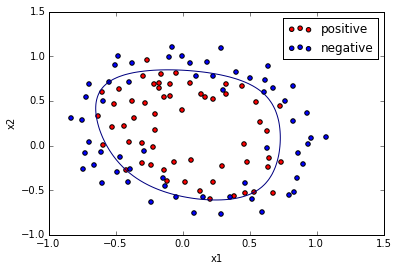

In [61]:
# オーバーフィッティングさせる
# 正則化項の係数λを0にする
# しなかった…

import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

def plot_data(X, y):
    # positiveクラスのデータのインデックス
    positive = [i for i in range(len(y)) if y[i] == 1]
    # negativeクラスのデータのインデックス
    negative = [i for i in range(len(y)) if y[i] == 0]

    plt.scatter(X[positive, 0], X[positive, 1], c='red', marker='o', label="positive")
    plt.scatter(X[negative, 0], X[negative, 1], c='blue', marker='o', label="negative")

    
# こんなことするんだね
def mapFeature(x1, x2, degree=6):
    """
    特徴x1と特徴x2を組み合わせたdegree次（ここでは6次）の項まで特徴をデータに追加
    バイアス項に対応するデータ1も追加
    """
    # データ行列に1を追加
    m = x1.shape[0]
    data_x = np.ones((m, 1))
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            new_x = (x1 ** (i - j) * x2 ** j).reshape((m, 1)) # 二項定理みたいな感じで追加していく
            data_x = np.hstack((data_x, new_x))
    return data_x

if __name__ == "__main__":
    # 訓練データをロード
    data = np.genfromtxt("ex2data2.txt", delimiter=",")
    # print data
    data_x = data[:, (0,1)]
    data_y = data[:, 2]

    # 訓練データ数
    m = len(data_y)

    # 訓練データをプロット
    plt.figure(1)
    plot_data(data_x, data_y)

    # 特徴量のマッピング
    # 元の特徴量の6次までの多項式項を追加
    # 1列目の1も追加する
    data_x = mapFeature(data_x[:, 0], data_x[:, 1], 6)

    # 訓練データを共有変数にする
    X = theano.shared(np.asarray(data_x, dtype=theano.config.floatX), borrow=True)
    y = theano.shared(np.asarray(data_y, dtype=theano.config.floatX), borrow=True)

    # パラメータを共有変数にし、0で初期化
    # 訓練データに1を加えたのでバイアスもthetaに含めてしまう
    theta = theano.shared(np.zeros(data_x.shape[1], dtype=theano.config.floatX), name='theta', borrow=True)

    # コスト関数を定義
    # 交差エントロピー誤差関数
    lam = 0
    h = T.nnet.sigmoid(T.dot(X, theta))
    cost = (1.0 / m) * T.sum(-y * T.log(h) - (1 - y) * T.log(1 - h)) + (lam / (2 * m)) * T.sum(theta ** 2)

    # 勾配降下法
    # コスト関数の微分
    g_theta = T.grad(cost=cost, wrt=theta)

    # パラメータ更新式
    learning_rate = 0.001
    updates = [(theta, theta - learning_rate * g_theta)]
    # 訓練用の関数を定義
    train_model = theano.function(inputs=[], outputs=cost, updates=updates)
    # 高度な収束判定はせずにiterations回だけ繰り返す
    iterations = 100000
    for iter in range(iterations):
        current_cost = train_model()
        # print iter, current_cost

    # 更新されたパラメータを表示
    t = theta.get_value()
    print "theta:", t

    # 決定境界を描画
    plt.figure(1)
    gridsize = 100
    x1_vals = np.linspace(-1, 1.5, gridsize)
    x2_vals = np.linspace(-1, 1.5, gridsize)
    x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)
    z = np.zeros((gridsize, gridsize))
    for i in range(gridsize):
        for j in range(gridsize):
            x1 = np.array([x1_vals[i, j]])
            x2 = np.array([x2_vals[i, j]])
            z[i, j] = np.dot(mapFeature(x1, x2), theta.get_value())

    # 決定境界はsigmoid(z)=0.5、すなわちz=0の場所
    plt.contour(x1_vals, x2_vals, z, levels=[0])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim((-1, 1.5))
    plt.ylim((-1, 1.5))
    plt.legend()
    plt.show()